In [25]:
using PyPlot, Optim, GaussianProcesses

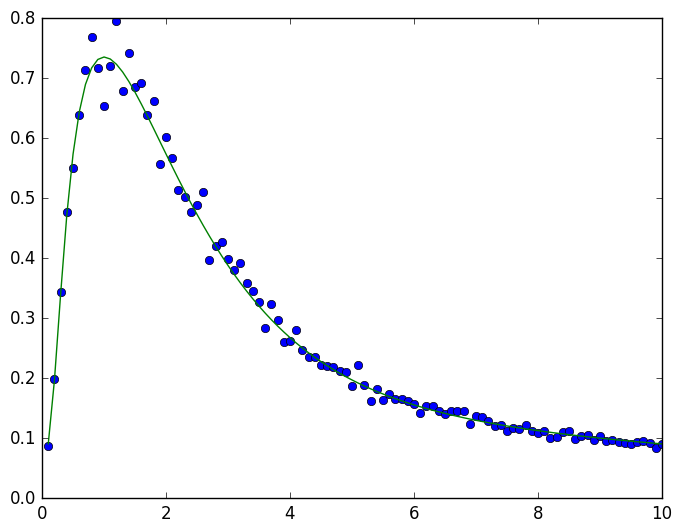

In [26]:
n = 100
xs = collect(linspace(0.1, 10.0, n))
ys = map(x->x*exp(-x)+exp(-1/x)/x, xs)
zs = ys .* (0.05randn(size(ys)) + 1.0)
plot(xs, zs, "o", xs, ys, "-")
savefig("data.pdf")

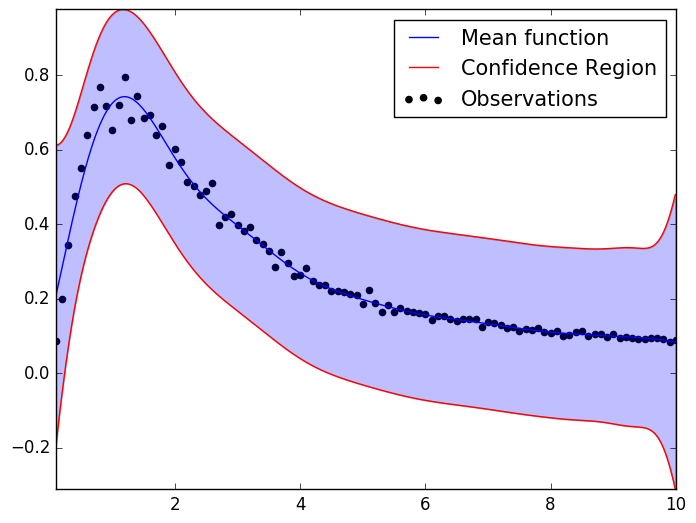

In [27]:
mZero = MeanZero()
kern = SE(0.0, 0.0)
logObsNoise = -1.0
gp = GP(xs, zs, mZero, kern, logObsNoise)
plot(gp)

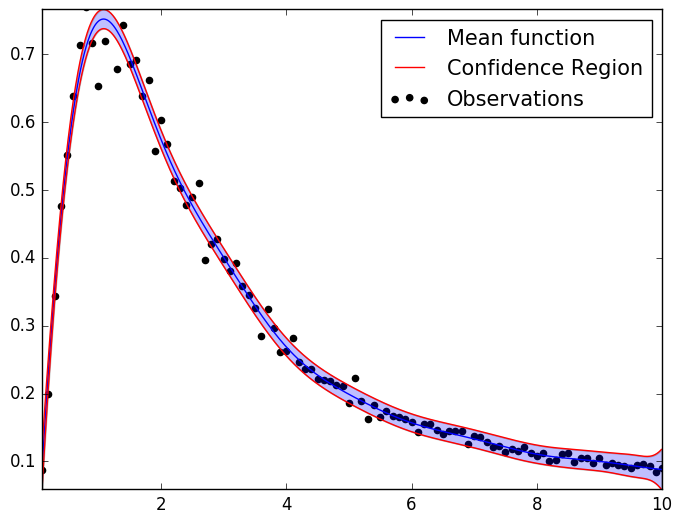

In [28]:
optimize!(gp)
plot(gp)
savefig("fitting.pdf")

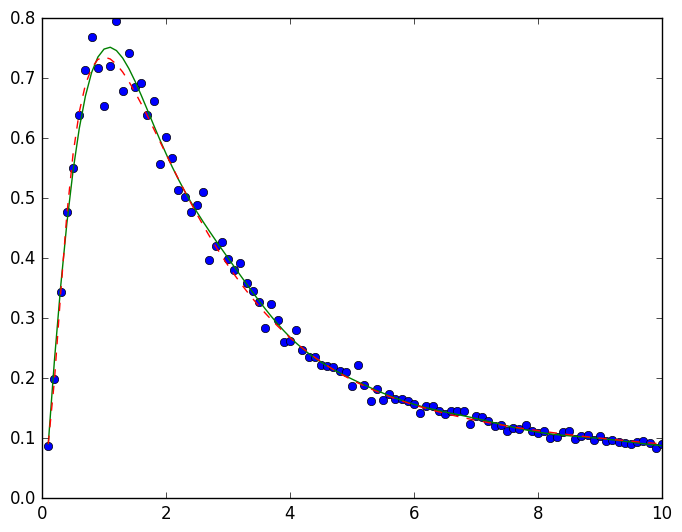

In [29]:
predicts = predict(gp, xs)[1]
plot(xs, zs, "o", xs, predicts, "-", xs, ys, "--")
savefig("result.pdf")

In [30]:
res = optimize(x->-predict(gp, [x])[1][1], 0.0, 10.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 10.000000]
 * Minimizer: 1.082299e+00
 * Minimum: -7.521240e-01
 * Iterations: 17
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 18

In [31]:
Optim.minimizer(res), -Optim.minimum(res)

(1.0822986884334083,0.7521239880941719)

In [8]:
2exp(-1)

0.7357588823428847

GaussianProcesses.IsotropicData([0.0 0.01 … 96.04 98.01; 0.01 0.0 … 94.09 96.04; … ; 96.04 94.09 … 0.0 0.01; 98.01 96.04 … 0.01 0.0])